# UN Data Analysis
### UN GDP Per Capita 

In [1]:
#Q3. Import the required packages with their customary aliases as follows:

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Q4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
#Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [4]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

In [5]:
#Q5. How many rows and columns are in `gdp_df`? What are the data types of each column?

##### 8219 rows and 4 columns

In [20]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [7]:
#Q6.Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
#Dropping Value Footnotes
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

In [9]:
#rename the three columns to 'Country', 'Year', and 'GDP_Per_Capita'
gdp_df=gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [10]:
#Q7. How many countries have data for all years? 
#Which countries are missing many years of data? Look at the number of observations per year. 
#What do you notice? 

In [21]:
#the range of years
range(gdp_df['Year'].min(), gdp_df['Year'].max())

range(1990, 2023)

In [12]:
all_years = gdp_df['Year'].unique()

In [13]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()

In [14]:
country_year_counts

Country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: Year, Length: 247, dtype: int64

In [15]:
number_of_all_years = len(all_years)

In [16]:
#determine countries with data for all years
countries_with_all_years = country_year_counts[country_year_counts == number_of_all_years]

In [17]:
# Number of countries that have data for all years
number_of_countries = len(countries_with_all_years)
number_of_countries

228

In [65]:
#Number of countries that do not have data for all years
len(country_year_counts[country_year_counts < number_of_all_years])

19

In [18]:
#Q8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. 
#Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. 
#Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? 
#How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [72]:
#plotting histogram for the distribution of GDP per capita in the year 2020
gdp_2020 = gdp_df[gdp_df['Year']==2020]

Text(0, 0.5, 'Frequency')

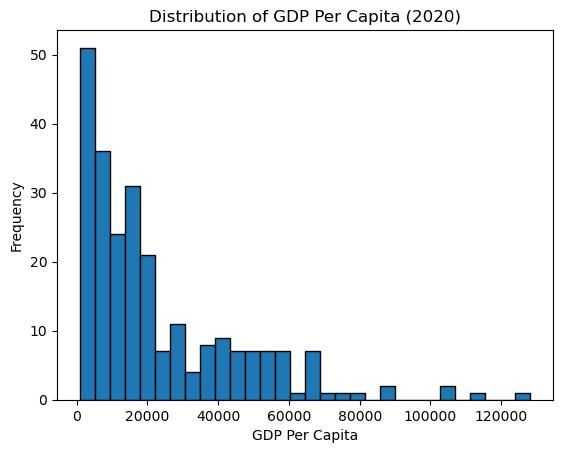

In [96]:
plt.hist(gdp_2020['GDP_Per_Capita'], bins=30, edgecolor='black')
plt.title('Distribution of GDP Per Capita (2020)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Frequency')

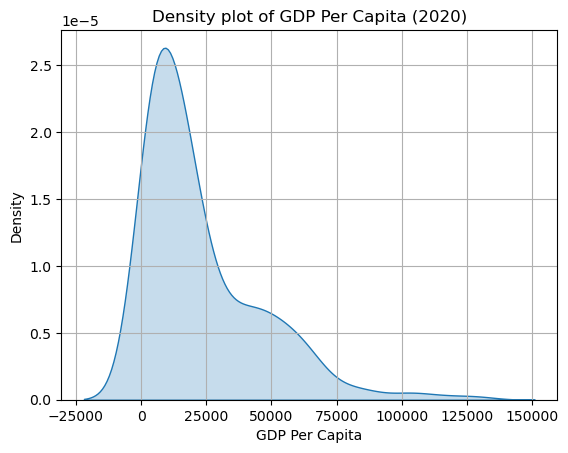

In [95]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)
plt.title('Density plot of GDP Per Capita (2020)')
plt.xlabel('GDP Per Capita')
plt.ylabel('Density')
plt.grid(True)

In [19]:
#Q9  What was the median GDP per capita value in 2020?
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]
median_gdp_df_2020 = gdp_df_2020['GDP_Per_Capita'].median()
round(median_gdp_df_2020, 2)

15309.24